# Jay Bhanushali - 60009200047
---
# ML-II Lab 6: LSTM

In [ ]:
import numpy
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense, LSTM, Embedding
from keras_preprocessing.sequence import pad_sequences

In [ ]:
top_words = 5000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train[1]))

189


In [ ]:
max_review_length = 600
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(25000, 600) (25000,)
(25000, 600) (25000,)


In [ ]:
embedding_vector_length = 64

model = Sequential([
    Embedding(top_words + 1, embedding_vector_length, input_length=max_review_length),
    LSTM(200),
    Dense(50, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 64)           320064    
                                                                 
 lstm (LSTM)                 (None, 200)               212000    
                                                                 
 dense (Dense)               (None, 50)                10050     
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 552,315
Trainable params: 552,315
Non-trai

In [ ]:
hist=model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=0, validation_data=(X_test,Y_test))

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.89%


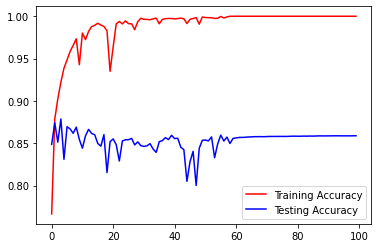

In [ ]:
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

In [ ]:
Y_pred = model.predict(X_test)

782/782 [==============================] - 11s 13ms/step


In [ ]:
print(Y_pred[:5])

[[4.854946e-15]
 [1.000000e+00]
 [6.466512e-10]
 [1.000000e+00]
 [1.000000e+00]]


In [ ]:
for i in range(len(Y_pred)):
    if(Y_pred[i] >= 0.5):
        Y_pred[i] = int(1)
    else:
        Y_pred[i] = int(0)

In [ ]:
print(Y_pred[:5])

[[0.]
 [1.]
 [0.]
 [1.]
 [1.]]


In [ ]:
incorr = 0
for i in range(len(Y_pred)):
    if Y_pred[i] != Y_test[i]:
        incorr += 1

print(incorr,'/',len(Y_pred))

3528 / 25000


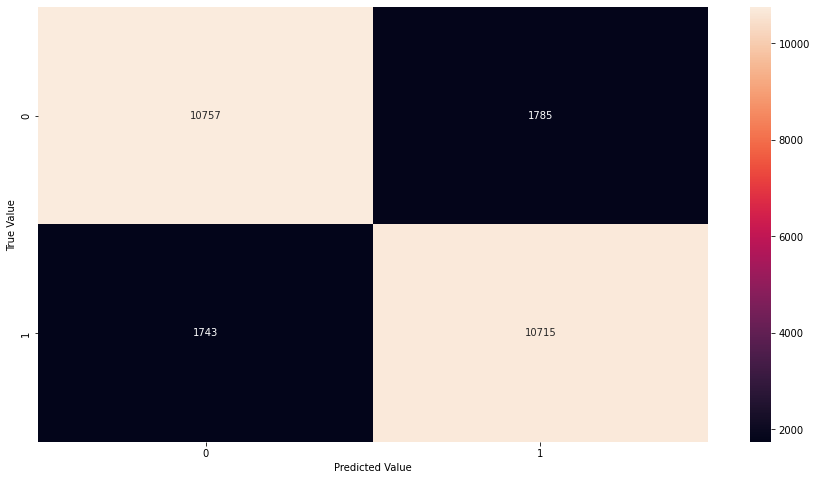

In [ ]:
confuse_mat = tf.math.confusion_matrix(labels=Y_pred, predictions=Y_test)
plt.figure(figsize=(15,8))
sns.heatmap(confuse_mat, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()